In [2]:
import os
import pandas as pd
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize']=(14,6)
# import necessary libraries and specify that graphs should be plotted inline.
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.cross_validation import train_test_split,cross_val_score,StratifiedKFold, KFold
#from sklearn.model_selection import cross_val_score
from sklearn import feature_selection
from sklearn import datasets, tree, linear_model, svm, cross_validation
from sklearn import preprocessing
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score, make_scorer, roc_auc_score, roc_curve
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.feature_selection import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
from sklearn.grid_search import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_digits
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from __future__ import print_function
import subprocess
import time
from operator import itemgetter
import random
random.seed(0)
import numpy as np
np.random.seed(0)
min_max_scaler = preprocessing.MinMaxScaler()
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN,SMOTETomek
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_gaussian_quantiles

ros = RandomOverSampler()
sm = SMOTE(kind='regular')
os.chdir('C:\Users\Pranathi\Desktop\MSBA\Fall\Predictive analytics\Assignment 5\HW5')


Populating the interactive namespace from numpy and matplotlib


C:\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Anaconda2\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [ ]:
def mapping(y):
    if y>= 0.7:
        return(1)

## Functions for Cross-validation and Prediction

In [45]:
#Functions
def over_cross(clf,X,y,sm):
    scores_oc = []
    kfolds_oc = cross_validation.StratifiedKFold(y, n_folds=5, shuffle=True, random_state=0)
    for train_index, test_index in kfolds_oc:
        X_train_oc, X_test_oc = X[train_index], X[test_index]
        y_train_oc, y_test_oc = y[train_index], y[test_index]
        X_train_oc, y_train_oc = sm.fit_sample(X_train_oc, y_train_oc)
        clf.fit(X_train_oc, y_train_oc)
        prediction_oc=clf.predict(X_test_oc)
        scores_oc.append(f1_score(y_test_oc, prediction_oc,pos_label=1))
    return np.mean(scores_oc)

def over_cross_probability(clf,X,y,sm,prob):
    scores_oc = []
    kfolds_oc = cross_validation.StratifiedKFold(y, n_folds=5, shuffle=True, random_state=0)
    for train_index, test_index in kfolds_oc:
        X_train_oc, X_test_oc = X[train_index], X[test_index]
        y_train_oc, y_test_oc = y[train_index], y[test_index]
        X_train_oc, y_train_oc = sm.fit_sample(X_train_oc, y_train_oc)
        clf.fit(X_train_oc, y_train_oc)
        prediction_prob_oc=clf.predict_proba(X_test_oc)[:,1]
        new_preds_oc = [0 if x <prob else 1 for x in prediction_prob_oc]
        scores_oc.append(f1_score(y_test_oc, new_preds_oc,pos_label=1))
    return np.mean(scores_oc)

def pred_prob(clf,x_pred_test,y_pred_test,prob):
    prediction_prob_oc=clf.predict_proba(x_pred_test)[:,1]
    new_prob_preds = [0 if x <prob else 1 for x in prediction_prob_oc]
    return f1_score(y_pred_test, new_prob_preds,pos_label=1)


def cust_over_cm(clf,x_pred_test,y_pred_test,prob,sm):
    scores_oc = []
    columns=["Predictions","Actual"]
    df_conf = pd.DataFrame( columns=columns)
    df_conf = df_conf.fillna(0)  
    scores_oc = []
    kfolds_oc = cross_validation.StratifiedKFold(y, n_folds=5, shuffle=True, random_state=0)
    for train_index, test_index in kfolds_oc:
        X_train_oc, X_test_oc = X[train_index], X[test_index]
        y_train_oc, y_test_oc = y[train_index], y[test_index]
        X_train_oc, y_train_oc = sm.fit_sample(X_train_oc, y_train_oc)
        clf.fit(X_train_oc, y_train_oc)
        prediction_prob_oc=clf.predict_proba(X_test_oc)[:,1]
        new_preds_oc = [0 if x <prob else 1 for x in prediction_prob_oc]
        df=pd.DataFrame({'Predictions':new_preds_oc, 'Actual':y_test_oc})
        df_conf=df_conf.append(df)
        scores_oc.append(f1_score(y_test_oc, new_preds_oc,pos_label=1))
    return np.mean(scores_oc),df_conf
    

In [11]:
music=pd.read_csv("Train.csv")
train_music=pd.read_csv("Train.csv")
test_music=pd.read_csv("Test.csv")


In [12]:
train_music.head()

,age,male,friend_cnt,avg_friend_age,avg_friend_male,friend_country_cnt,subscriber_friend_cnt,songsListened,lovedTracks,posts,...,delta_songsListened,delta_lovedTracks,delta_posts,delta_playlists,delta_shouts,tenure,good_country,delta_good_country,user_id,adopter
0,24.0,0.0,20.0,26.333333,0.777778,6.0,0.0,37804.0,4.0,20.0,...,54.0,0.0,0.0,0.0,0.0,79.0,0.0,0.0,10.0,0
1,29.0,1.0,12.0,26.900000,0.818182,6.0,1.0,15955.0,19.0,4.0,...,802.0,0.0,0.0,0.0,1.0,80.0,0.0,0.0,58.0,0
2,22.0,0.0,4.0,21.000000,1.000000,2.0,0.0,31441.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,53.0,0.0,0.0,72.0,0
3,27.0,0.0,1.0,29.000000,1.000000,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,59.0,0.0,0.0,121.0,0
4,22.0,1.0,4.0,21.250000,0.750000,1.0,0.0,774.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,60.0,0.0,0.0,137.0,0


In [3]:

X = music.iloc[0:,:25].values # we only take the first two features in order to easily visualize the results. 
                      # We could avoid this ugly slicing by using a two-dim dataset
y = music.adopter.values

test_X = test_music.iloc[0:,:25].values # we only take the first two features in order to easily visualize the results. 
                      # We could avoid this ugly slicing by using a two-dim dataset

df_user = pd.DataFrame(test_music["user_id"], columns=['user_id'])


In [4]:
##Normalize train and test together
train_music['flag']=1
test_music['flag']=0
train_music.drop('adopter', axis=1, inplace=True)

combine=train_music.append(test_music)
combine_norm = min_max_scaler.fit_transform(combine)

df_combine_norm=pd.DataFrame(combine_norm)
train_norm=df_combine_norm[df_combine_norm[26]==1]
test_norm=df_combine_norm[df_combine_norm[26]==0]

In [13]:
train_music.head()

,age,male,friend_cnt,avg_friend_age,avg_friend_male,friend_country_cnt,subscriber_friend_cnt,songsListened,lovedTracks,posts,...,delta_songsListened,delta_lovedTracks,delta_posts,delta_playlists,delta_shouts,tenure,good_country,delta_good_country,user_id,flag
0,24.0,0.0,20.0,26.333333,0.777778,6.0,0.0,37804.0,4.0,20.0,...,54.0,0.0,0.0,0.0,0.0,79.0,0.0,0.0,10.0,1
1,29.0,1.0,12.0,26.900000,0.818182,6.0,1.0,15955.0,19.0,4.0,...,802.0,0.0,0.0,0.0,1.0,80.0,0.0,0.0,58.0,1
2,22.0,0.0,4.0,21.000000,1.000000,2.0,0.0,31441.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,53.0,0.0,0.0,72.0,1
3,27.0,0.0,1.0,29.000000,1.000000,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,59.0,0.0,0.0,121.0,1
4,22.0,1.0,4.0,21.250000,0.750000,1.0,0.0,774.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,60.0,0.0,0.0,137.0,1


## Logistic Regression

In [53]:
#X_norm = StandardScaler().fit_transform(X)
#X_norm = min_max_scaler.fit_transform(X)
X_norm = train_music.iloc[0:,:25].values
X_train, X_test, y_train, y_test = train_test_split(
     X_norm, y, test_size=0.2, random_state=0,stratify=y)
columns=['Penalty','C','CV F Measure','Test F Measure']
df_logistic = pd.DataFrame( columns=columns)
df_logistic = df_logistic.fillna(0) 
# Set regularization parameter
prob=0.5
#sm = SMOTEENN()
#sm = SMOTETomek()
sm= SMOTE(ratio = 0.4, kind = 'borderline1', random_state = 0)
for i, C in enumerate((100, 1, 0.01)):
    # turn down tolerance for short training time
    clf_l1_LR = LogisticRegression(C=C, penalty='l1', tol=0.01)
    clf_l2_LR = LogisticRegression(C=C, penalty='l2', tol=0.01)
    clf_l1_LR_cross = LogisticRegression(C=C, penalty='l1', tol=0.01)
    clf_l2_LR_cross = LogisticRegression(C=C, penalty='l2', tol=0.01)
    clf_l1_LR.fit(X_train, y_train)
    clf_l2_LR.fit(X_train, y_train)

    prediction=clf_l1_LR.predict(X_test)
    df = pd.DataFrame([['L1',C,over_cross_probability(clf_l1_LR,X_train,y_train,sm,prob),pred_prob(clf_l1_LR,X_test,y_test,prob)\
                       ]],columns=columns)

    df_logistic=df_logistic.append(df)
    prediction=clf_l2_LR.predict(X_test)
    df = pd.DataFrame([['L2',C,over_cross_probability(clf_l2_LR,X_train,y_train,sm,prob),pred_prob(clf_l2_LR,X_test,y_test,prob)\
                       ]],columns=columns)

    df_logistic=df_logistic.append(df)
    df_logistic


In [63]:
#X_norm = StandardScaler().fit_transform(X)
X_norm = train_music.iloc[0:,:25].values
X_train, X_test, y_train, y_test = train_test_split(
     X_norm, y, test_size=0.2, random_state=0,stratify=y)
columns=['Probability','CV F Measure','Test F Measure']
df_logistic = pd.DataFrame( columns=columns)
df_logistic = df_logistic.fillna(0) 
sm = SMOTE(0.4,kind = 'borderline2',random_state = 1)
for prob in arange(0.1,1,0.1):
    clf = LogisticRegression(C=100, penalty='l1', tol=0.01)
    df = pd.DataFrame([[prob,over_cross_probability(clf,X_train,y_train,sm,prob),pred_prob(clf,X_test,y_test,prob)\
                       ]],columns=columns)
    df_logistic=df_logistic.append(df)
    
df_logistic


,Probability,CV F Measure,Test F Measure
0,0.1,0.034860,0.034697
0,0.2,0.046352,0.041413
0,0.3,0.073812,0.068900
0,0.4,0.091331,0.097576
0,0.5,0.101777,0.112636
0,0.6,0.105295,0.110661
0,0.7,0.103715,0.106047
0,0.8,0.094848,0.094388
0,0.9,0.076428,0.078902


In [ ]:
#X_norm = StandardScaler().fit_transform(X)
X_norm = train_music.iloc[0:,:25].values
X_train, X_test, y_train, y_test = train_test_split(
     X_norm, y, test_size=0.2, random_state=0,stratify=y)
columns=['Probability','CV F Measure','Test F Measure']
df_logistic = pd.DataFrame( columns=columns)
df_logistic = df_logistic.fillna(0) 
sm = SMOTE(0.6,kind = 'svm',random_state = 1)
for prob in arange(0.1,1,0.1):
    clf = LogisticRegression(C=100, penalty='l1', tol=0.01)
    df = pd.DataFrame([[prob,over_cross_probability(clf,X_train,y_train,sm,prob),pred_prob(clf,X_test,y_test,prob)\
                       ]],columns=columns)
    df_logistic=df_logistic.append(df)
    
df_logistic


In [54]:
#X_norm = StandardScaler().fit_transform(X)
X_norm = train_norm.iloc[0:,:25].values
X_train, X_test, y_train, y_test = train_test_split(
     X_norm, y, test_size=0.2, random_state=0,stratify=y)
columns=['Probability','CV F Measure','Test F Measure']
df_logistic = pd.DataFrame( columns=columns)
df_logistic = df_logistic.fillna(0) 
sm = SMOTEENN()
#sm = SMOTETomek()
for prob in arange(0.8,0.9,0.1):
    clf = LogisticRegression(C=100, penalty='l1', tol=0.01)
    df = pd.DataFrame([[prob,over_cross_probability(clf,X_train,y_train,sm,prob),pred_prob(clf,X_test,y_test,prob)\
                       ]],columns=columns)
    df_logistic=df_logistic.append(df)
    
df_logistic

#0.11007
#output generated using 0.9 i think

,Probability,CV F Measure,Test F Measure
0,0.8,0.109261,0.109848


In [ ]:
#Generate Output file
X_val = test_norm.iloc[0:,:25].values
X_norm = train_norm.iloc[0:,:25].values
X_train=X_norm
y_train=y
sm = SMOTEENN()
X_train, y_train = sm.fit_sample(X_train, y_train)
clf = LogisticRegression(C=100, penalty='l1', tol=0.01)
clf.fit(X_train,y_train)
predictions=clf.predict_proba(X_val)[:,1]
new_predictions = [0 if x <0.7 else 1 for x in predictions]
df_out = pd.DataFrame(new_predictions, columns=['prediction(adopter)'])
df_out=pd.concat([df_user,df_out], axis=1)
df_out.to_csv("submit_logistic_kk.csv",sep=",",index=False)

## Gradient Boosted Trees

In [ ]:
X_val = test_music.iloc[0:,:25].values
X_train = music.iloc[0:,:25].values
y_train = y

sm= SMOTE(ratio = 0.4, kind = 'borderline1', random_state = 0)
X_train, y_train = sm.fit_sample(X_train, y_train)

clf = GradientBoostingClassifier(**params).fit(X_train, y_train)

predictions=clf.predict(X_val)

#new_predictions = [0 if x <0.8 else 1 for x in predictions]
df_out = pd.DataFrame(predictions, columns=['prediction(adopter)'])
df_out=pd.concat([df_user,df_out], axis=1)
df_out.to_csv("submit_gb.csv",sep=",",index=False)


In [ ]:
#checking oversampling ratio
X_norm = music.iloc[0:,:25].values
X_train, X_test, y_train, y_test = train_test_split(
     X_norm, y, test_size=0.2, random_state=0,stratify=y)
columns=['ratio','0','1']

b= pd.DataFrame()
for i in arange(0.4,0.8,0.1):
        sm= SMOTE(ratio = i, kind = 'borderline1', random_state = 0)
        X_train_oc, y_train_oc = sm.fit_sample(X_train, y_train)
        df = pd.DataFrame({'flag' : y_train_oc})
        x = df.groupby(['flag']).size()
        #a = pd.DataFrame({'ratio': i , '0': x[0], '1': x[1]})
        a = df = pd.DataFrame([[i,x[0],x[1]]],columns=columns)
        b = b.append(a)


## Bagged Decision Trees for Classification

In [83]:
#X_norm = train_norm.iloc[0:,:25].values
X_norm = music.iloc[0:,:25].values
X_train, X_test, y_train, y_test = train_test_split(
     X_norm, y, test_size=0.2, random_state=0,stratify=y)
columns=['k','CV F Measure','Test F Measure']

for k in arange(3,15,2):
        sm= SMOTE(ratio = i , kind = 'borderline1', random_state = 0)
        
        clf = BaggingClassifier(base_estimator=neighbors.KNeighborsClassifier(k), n_estimators= 10,\
                           random_state= 0)
        df = pd.DataFrame([[k,over_cross_probability(clf,X_train,y_train,sm,prob),pred_prob(clf,X_test,y_test,prob)\
                       ]],columns=columns)
df     


,k,CV F Measure,Test F Measure
0,13,0.066664,0.050154


In [82]:
#X_norm = train_norm.iloc[0:,:25].values
X_norm = music.iloc[0:,:25].values
X_train, X_test, y_train, y_test = train_test_split(
     X_norm, y, test_size=0.2, random_state=0,stratify=y)
columns=['n_estimators' ,'ratio','CV F Measure','Test F Measure']

for n_estimators in arange(10,100,10):
     for i in arange(0.4,0.8,0.1):
        sm= SMOTE(ratio = i , kind = 'borderline1', random_state = 0)
        
        clf = BaggingClassifier(base_estimator=neighbors.KNeighborsClassifier(), n_estimators= n_estimators,\
                           random_state= 0)
        df = pd.DataFrame([[n_estimators,i,over_cross_probability(clf,X_train,y_train,sm,prob),pred_prob(clf,X_test,y_test,prob)\
                       ]],columns=columns)
df

,CV F Measure,Test F Measure
0,0.024758,0.021798


In [7]:
#X_norm = StandardScaler().fit_transform(X)
X_norm = music.iloc[0:,:25].values
X_train, X_test, y_train, y_test = train_test_split(
     X_norm, y, test_size=0.2, random_state=0,stratify=y)
columns=['Trees','CV F Measure','Test F Measure']
df_dt = pd.DataFrame( columns=columns)
df_dt = df_dt.fillna(0) 
sm = SMOTEENN()
cart = DecisionTreeClassifier()
prob=0.8
#sm = SMOTETomek()
for num_trees in arange(5,15,1):
    clf = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=0)
    df = pd.DataFrame([[num_trees,over_cross_probability(clf,X_train,y_train,sm,prob),pred_prob(clf,X_test,y_test,prob)\
                       ]],columns=columns)
    df_dt=df_dt.append(df)
    
df_dt



,Trees,CV F Measure,Test F Measure
0,5.0,0.013037,0.028329
0,6.0,0.008979,0.018182
0,7.0,0.006287,0.025078
0,8.0,0.001575,0.024922
0,9.0,0.000000,0.012739
0,10.0,0.003125,0.012579
0,11.0,0.004775,0.012461
0,12.0,0.004749,0.018809
0,13.0,0.001575,0.012579
0,14.0,0.001606,0.006329


## Extra Trees Classifier

In [9]:
from sklearn.ensemble import ExtraTreesClassifier
X_norm = music.iloc[0:,:25].values
X_train, X_test, y_train, y_test = train_test_split(
     X_norm, y, test_size=0.2, random_state=0,stratify=y)
num_trees = 20
max_features = 15
columns=['Trees','CV F Measure','Test F Measure']
sm = SMOTEENN()
cart = DecisionTreeClassifier()
prob=0.8
clf = ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features,random_state=0)
df = pd.DataFrame([['Extra',over_cross_probability(clf,X_train,y_train,sm,prob),pred_prob(clf,X_test,y_test,prob)\
                       ]],columns=columns)
df

,Trees,CV F Measure,Test F Measure
0,Extra,0.0,0.0


## K-nn

In [6]:
# Attribute Selection and Knn

columns=['attr','k','CV F Measure','Test F Measure']
X_norm = train_norm.iloc[0:,:25].values
X_train, X_test, y_train, y_test = train_test_split(
     X_norm, y, test_size=0.2, random_state=0,stratify=y)

df_k = pd.DataFrame( columns=columns)
df_k = df_k.fillna(0) 
prob=0.5
for attr in range(1,26):
    for k in range(1,30):
        model = feature_selection.SelectKBest(score_func=feature_selection.f_classif,\
                                      k=attr)
        results=model.fit(X_train,y_train)
        X_subset = X_train[:, results.get_support()]
        X_subtest = X_test[:, results.get_support()]
        clf = neighbors.KNeighborsClassifier(k)
        df = pd.DataFrame([[attr,k,over_cross_probability(clf,X_subset,y_train,sm,prob),pred_prob(clf,X_subtest,y_test,prob)\
                       ]],columns=columns)
        df_k=df_k.append(df)

In [10]:
df_k.sort_values(by="CV F Measure",ascending=False).head(10)

,attr,k,CV F Measure,Test F Measure
0,2.0,28.0,0.079487,0.077580
0,2.0,22.0,0.079275,0.080144
0,3.0,7.0,0.078780,0.068154
0,2.0,25.0,0.078518,0.077535
0,3.0,8.0,0.078277,0.067082
0,2.0,24.0,0.078065,0.081400
0,3.0,9.0,0.077746,0.069307
0,2.0,27.0,0.077712,0.072581
0,3.0,15.0,0.077648,0.065427
0,3.0,5.0,0.077373,0.072646


In [11]:
#Probability for knn
X_norm = train_norm.iloc[0:,:25].values
X_train, X_test, y_train, y_test = train_test_split(
     X_norm, y, test_size=0.2, random_state=0,stratify=y)
columns=['Probability','CV F Measure','Test F Measure']
df_knn_prob = pd.DataFrame( columns=columns)
df_knn_prob = df_knn_prob.fillna(0) 
sm = SMOTEENN(0.6,random_state = 0)
clf = neighbors.KNeighborsClassifier(28)
model = feature_selection.SelectKBest(score_func=feature_selection.f_classif,\
                                      k=2)
results=model.fit(X_train,y_train)
X_subset = X_train[:, results.get_support()]
X_subtest = X_test[:, results.get_support()]

for prob in arange(0.1,1,0.1):
    df = pd.DataFrame([[prob,over_cross_probability(clf,X_subset,y_train,sm,prob),pred_prob(clf,X_subtest,y_test,prob)\
                       ]],columns=columns)
    df_knn_prob=df_knn_prob.append(df)
    
df_knn_prob
#0.92 probability

,Probability,CV F Measure,Test F Measure
0,0.1,0.090877,0.094862
0,0.2,0.091163,0.088847
0,0.3,0.086729,0.085590
0,0.4,0.094517,0.083588
0,0.5,0.078263,0.077333
0,0.6,0.084028,0.083650
0,0.7,0.070069,0.047794
0,0.8,0.054333,0.060120
0,0.9,0.031323,0.017045


## Gradient Boosting

In [5]:
columns=['n_estimators','CV F Measure','Test F Measure']
X_norm = music.iloc[0:,:25].values
X_train, X_test, y_train, y_test = train_test_split(
     X_norm, y, test_size=0.2, random_state=0,stratify=y)

df_gb = pd.DataFrame( columns=columns)
df_gb = df_gb.fillna(0) 
prob=0.5
for n_estimators in arange(20,90,10):
    sm= SMOTE(ratio = 0.4 , kind = 'borderline1', random_state = 0)    prob=0.5
    params = {'n_estimators': n_estimators,  'learning_rate': 0.05, 'subsample': 0.8, 'random_state': 0, 'min_samples_leaf':50,\
              'max_depth':8, 'max_features':'sqrt', 'min_samples_split': 500}
    clf = GradientBoostingClassifier(**params).fit(X_train, y_train)
    df = pd.DataFrame([[n_estimators,over_cross_probability(clf,X_train,y_train,sm,prob),\
                            pred_prob(clf,X_test,y_test,prob)]],columns=columns)
    df_gb=df_gb.append(df)
df_gb
#n-estimators = 40


,n_estimators,CV F Measure,Test F Measure
0,20.0,0.115097,0.134003
0,30.0,0.113544,0.126872
0,40.0,0.118974,0.123142
0,50.0,0.112010,0.118609
0,60.0,0.100645,0.125683
0,70.0,0.093806,0.129241
0,80.0,0.086712,0.118616


In [86]:
columns=['max_depth','min_samples_split','CV F Measure','Test F Measure']
X_norm = music.iloc[0:,:25].values
X_train, X_test, y_train, y_test = train_test_split(
     X_norm, y, test_size=0.2, random_state=0,stratify=y)

df_gb = pd.DataFrame( columns=columns)
df_gb = df_gb.fillna(0) 
prob=0.5
for max_depth in arange(5,15,2):
    for min_samples_split in arange(200,1001,200):
        sm= SMOTE(ratio = 0.4 , kind = 'borderline1', random_state = 0)    
        params = {'n_estimators': 40,  'learning_rate': 0.05, 'subsample': 0.8, 'random_state': 0, 'min_samples_leaf':50,\
              'max_depth':max_depth, 'max_features':'sqrt', 'min_samples_split': min_samples_split}
        clf = GradientBoostingClassifier(**params).fit(X_train, y_train)
        df = pd.DataFrame([[max_depth,min_samples_split,over_cross_probability(clf,X_train,y_train,sm,prob),\
                            pred_prob(clf,X_test,y_test,prob)]],columns=columns)
        df_gb=df_gb.append(df)
        
df_gb.sort_values(by="CV F Measure",ascending=False).head(10)
#max_depth=5
#min_samples_split= 1000

,max_depth,min_samples_split,CV F Measure,Test F Measure
0,5.0,1000.0,0.116383,0.130370
0,5.0,200.0,0.112723,0.113372
0,5.0,600.0,0.110576,0.109705
0,5.0,800.0,0.109767,0.106242
0,5.0,400.0,0.101381,0.119581
0,7.0,800.0,0.088599,0.100746
0,7.0,1000.0,0.086054,0.117424
0,7.0,400.0,0.084912,0.095057
0,7.0,200.0,0.084624,0.104247
0,7.0,600.0,0.083532,0.093750


In [ ]:
columns=['min_samples_leaf','min_samples_split','CV F Measure','Test F Measure']
X_norm = music.iloc[0:,:25].values
X_train, X_test, y_train, y_test = train_test_split(
     X_norm, y, test_size=0.2, random_state=0,stratify=y)

df_gb = pd.DataFrame( columns=columns)
df_gb = df_gb.fillna(0) 
prob=0.5
for min_samples_leaf in arange(30,71,10):
    for min_samples_split in arange(200,1001,200):
        sm= SMOTE(ratio = 0.4 , kind = 'borderline1', random_state = 0)    
        prob=0.5
        params = {'n_estimators': 40,  'learning_rate': 0.05, 'subsample': 0.8, 'random_state': 0, \
                  'min_samples_leaf':min_samples_leaf, 'max_depth':5, 'max_features':'sqrt', \
                  'min_samples_split': min_samples_split}
        clf = GradientBoostingClassifier(**params).fit(X_train, y_train)
        df = pd.DataFrame([[min_samples_leaf,min_samples_split,over_cross_probability(clf,X_train,y_train,sm,prob),\
                            pred_prob(clf,X_test,y_test,prob)]],columns=columns)
        df_gb=df_gb.append(df)
        
df_gb.sort_values(by="CV F Measure",ascending=False).head(10)
#min_samples_split=400
#min_samples_leaf=50

In [17]:
#max_features
columns=['max_features','CV F Measure','Test F Measure']
X_norm = music.iloc[0:,:25].values
X_train, X_test, y_train, y_test = train_test_split(
     X_norm, y, test_size=0.2, random_state=0,stratify=y)

df_gb = pd.DataFrame( columns=columns)
df_gb = df_gb.fillna(0) 
prob=0.5
for max_features in arange(2,26,1):
    sm= SMOTE(ratio = 0.4 , kind = 'borderline1', random_state = 0)
    prob=0.5
    params = {'n_estimators': 40,  'learning_rate': 0.05, 'subsample': 0.8, 'random_state': 0, \
                  'min_samples_leaf':50, 'max_depth':5, 'max_features':'sqrt', \
                  'min_samples_split': 400,'max_features': max_features}
    clf = GradientBoostingClassifier(**params).fit(X_train, y_train)
    df = pd.DataFrame([[max_features,over_cross_probability(clf,X_train,y_train,sm,prob),\
                            pred_prob(clf,X_test,y_test,prob)]],columns=columns)
    df_gb=df_gb.append(df)
        
df_gb.sort_values(by="CV F Measure",ascending=False).head(10)
#max_features=7

,max_features,CV F Measure,Test F Measure
0,7.0,0.123419,0.136719
0,9.0,0.117369,0.127049
0,6.0,0.117167,0.122058
0,5.0,0.116958,0.122862
0,11.0,0.116652,0.122353
0,4.0,0.116104,0.118565
0,3.0,0.115625,0.123055
0,10.0,0.115327,0.124551
0,14.0,0.113932,0.128671
0,8.0,0.113723,0.132132


In [18]:
#Probability for gradient boost
X_norm = music.iloc[0:,:25].values
X_train, X_test, y_train, y_test = train_test_split(
     X_norm, y, test_size=0.2, random_state=0,stratify=y)
columns=['Probability','CV F Measure','Test F Measure']
df_gb_prob = pd.DataFrame( columns=columns)
df_gb_prob = df_gb_prob.fillna(0) 
sm= SMOTE(ratio = 0.4 , kind = 'borderline1', random_state = 0)
params = {'n_estimators': 40,  'learning_rate': 0.05, 'subsample': 0.8, 'random_state': 0, \
                  'min_samples_leaf':50, 'max_depth':5 \
                  'min_samples_split': 400,'max_features': 7}
clf = GradientBoostingClassifier(**params).fit(X_train, y_train)
for prob in arange(0.1,1,0.1):
    df = pd.DataFrame([[prob,over_cross_probability(clf,X_train,y_train,sm,prob),pred_prob(clf,X_test,y_test,prob)\
                       ]],columns=columns)
    df_gb_prob=df_gb_prob.append(df)
    
df_gb_prob
#0.5 probability

,Probability,CV F Measure,Test F Measure
0,0.1,0.053211,0.054313
0,0.2,0.085912,0.094874
0,0.3,0.104766,0.113684
0,0.4,0.116925,0.119075
0,0.5,0.120907,0.121807
0,0.6,0.094567,0.119403
0,0.7,0.049887,0.064838
0,0.8,0.003213,0.000000
0,0.9,0.000000,0.000000


In [ ]:
# Confusion Matrix for - gradient boost
X_norm = music.iloc[0:,:25].values
X_train, X_test, y_train, y_test = train_test_split(
     X_norm, y, test_size=0.2, random_state=0,stratify=y)
columns=['Probability','CV F Measure','Test F Measure']
df_gb_prob = pd.DataFrame( columns=columns)
df_gb_prob = df_gb_prob.fillna(0) 
sm = SMOTEENN()
params = {'n_estimators': 40,  'learning_rate': 0.05, 'subsample': 0.8, 'random_state': 0, \
                  'min_samples_leaf':50, 'max_depth':7, \
                  'min_samples_split': 400,'max_features': 7,'criterion':'make_scorer(f1_score,pos_label=1)'}
clf = GradientBoostingClassifier(**params).fit(X_train, y_train)
df = pd.DataFrame([[prob,over_cross_probability(clf,X_train,y_train,sm,prob),pred_prob(clf,X_test,y_test,prob)\
                       ]],columns=columns)
df


clf = GradientBoostingClassifier(**params).fit(X_norm, y)
score,df_conf=cust_over_cm(clf,X_norm,y,prob,sm)
letterone = df_conf.groupby(['Predictions','Actual'], as_index=False).size()
letterone.unstack()

In [ ]:
# Generating Confusion Matrix
X_norm = music.iloc[0:,:25].values

params = {'n_estimators': 40,  'learning_rate': 0.05, 'subsample': 0.8, 'random_state': 0, \
                  'min_samples_leaf':50, 'max_depth':7, \
                  'min_samples_split': 400,'max_features': 7,'criterion':'make_scorer(f1_score,pos_label=1)'}

clf = GradientBoostingClassifier(**params).fit(X_norm, y)
score,df_conf=cust_over_cm(clf,X_norm,y,prob,sm)
letterone = df_conf.groupby(['Predictions','Actual'], as_index=False).size()
letterone.unstack()

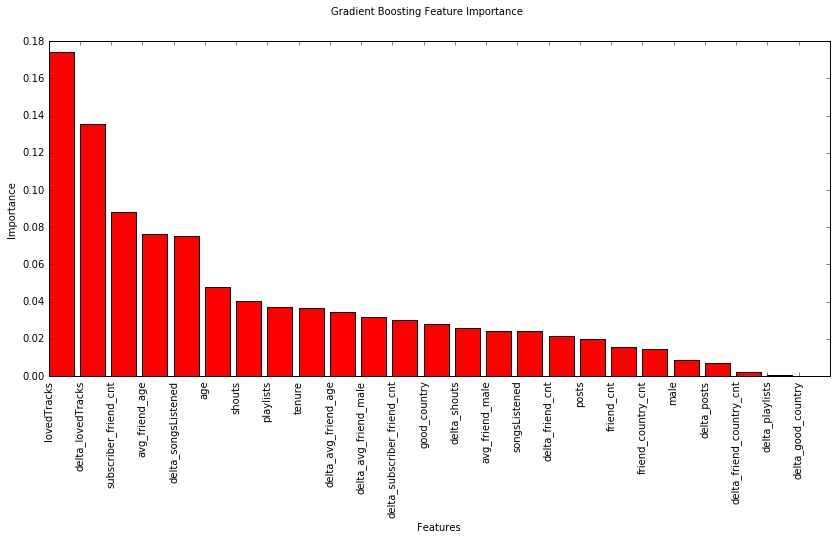

In [32]:
# Generating Best Features for original data
X_norm = music.iloc[0:,:25].values
predictors = music.iloc[0:,:25]
X_train, X_test, y_train, y_test = train_test_split(
     X_norm, y, test_size=0.2, random_state=0,stratify=y)

sm= SMOTE(ratio = 0.4 , kind = 'borderline1', random_state = 0)

X_train_oc, y_train_oc = sm.fit_sample(X_train, y_train)
        

params = {'n_estimators': 20,  'learning_rate': 0.05, 'subsample': 0.8, 'random_state': 0, \
                  'min_samples_leaf':60, 'max_depth':7, \
                  'min_samples_split': 600}
clf = GradientBoostingClassifier(**params).fit(X_train, y_train)
importances = clf.feature_importances_

colnames=predictors.columns.values

df_imp_features=pd.DataFrame({'Column':colnames, 'Importance':importances})
df_imp_features=df_imp_features.sort_values(by='Importance',ascending=False)

df_imp_features = df_imp_features.reset_index(drop=True)
#plt.bar(df_imp_features['Column'],df_imp_features['Importance'], color="r")
#plt.bar(df_imp_features.index,df_imp_features['Importance'], color="r")
LABELS = df_imp_features['Column']
plt.bar(df_imp_features.index,df_imp_features['Importance'], color="r")
plt.xticks(df_imp_features.index, LABELS)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.suptitle('Gradient Boosting Feature Importance')
#df_imp_features.head(45)




In [47]:
df_cut_features = df_imp_features[df_imp_features['Importance'] > 0.02]

df_cut_features = df_cut_features.reset_index(drop=True)

df_cut_features

X_cut=predictors[df_cut_features["Column"]]

imp_features =X_cut.columns.values



In [36]:
imp_features

array(['lovedTracks', 'delta_lovedTracks', 'subscriber_friend_cnt',
       'avg_friend_age', 'delta_songsListened', 'age', 'shouts',
       'playlists', 'tenure'], dtype=object)

In [48]:
X_imp_features = predictors[imp_features]

#X_imp_features.tail()

X_norm = X_imp_features.values

predictors = X_imp_features

predictors.columns.values

array(['delta_lovedTracks', 'subscriber_friend_cnt', 'playlists', 'age',
       'delta_songsListened', 'lovedTracks'], dtype=object)

In [54]:
#gradient boost for best features


X_norm = X_imp_features.values
X_train, X_test, y_train, y_test = train_test_split(
     X_norm, y, test_size=0.2, random_state=0,stratify=y)
columns=['Probability','CV F Measure','Test F Measure']
df_gb_prob = pd.DataFrame( columns=columns)
df_gb_prob = df_gb_prob.fillna(0) 
#sm= SMOTE(ratio = 0.4 , kind = 'borderline1', random_state = 0)
sm = SMOTEENN(random_state = 0 )
params = {'n_estimators': 40,  'learning_rate': 0.05, 'subsample': 0.8, 'random_state': 0, \
                  'min_samples_leaf':40, 'max_depth':7, \
                  'min_samples_split': 200,'max_features': 'sqrt'}

clf = GradientBoostingClassifier(**params).fit(X_train, y_train)
for prob in arange(0.3,0.6,0.1):
    df = pd.DataFrame([[prob,over_cross_probability(clf,X_train,y_train,sm,prob),pred_prob(clf,X_test,y_test,prob)\
                       ]],columns=columns)
    df_gb_prob=df_gb_prob.append(df)
    
df_gb_prob
#0.5 probability

,Probability,CV F Measure,Test F Measure
0,0.3,0.097958,0.104033
0,0.4,0.109082,0.117040
0,0.5,0.113611,0.123830


In [55]:
score,df_conf=cust_over_cm(clf,X_norm,y,0.5,sm)
letterone = df_conf.groupby(['Predictions','Actual'], as_index=False).size()
letterone.unstack()

Actual,0.0,1.0
Predictions,,
0.0,81428,1213
1.0,3714,327


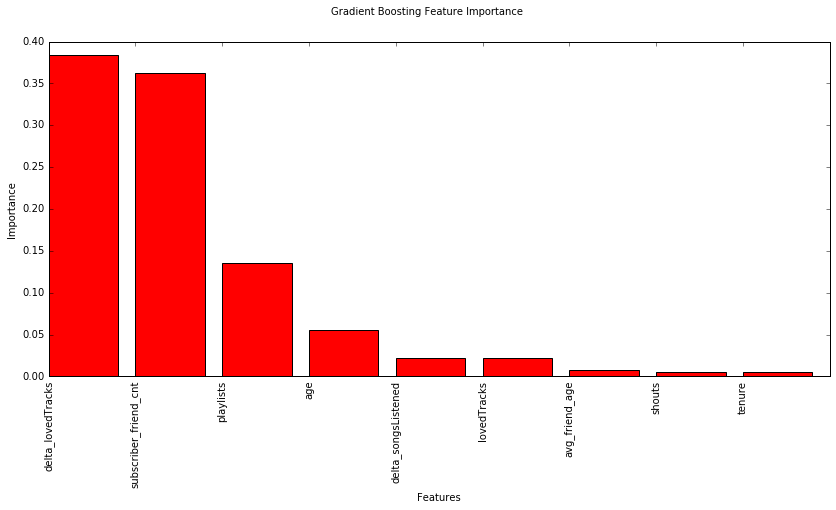

In [42]:
# Generating Best Features for over sampled data
X_norm = X_imp_features.values
predictors = X_imp_features

X_train, X_test, y_train, y_test = train_test_split(
     X_norm, y, test_size=0.2, random_state=0,stratify=y)

sm= SMOTE(ratio = 0.4 , kind = 'borderline1', random_state = 0)

X_train_oc, y_train_oc = sm.fit_sample(X_train, y_train)
        

params = {'n_estimators': 20,  'learning_rate': 0.05, 'subsample': 0.8, 'random_state': 0, \
                  'min_samples_leaf':60, 'max_depth':7, \
                  'min_samples_split': 600}
clf = GradientBoostingClassifier(**params).fit(X_train_oc, y_train_oc)
importances = clf.feature_importances_

colnames=predictors.columns.values

df_imp_features=pd.DataFrame({'Column':colnames, 'Importance':importances})
df_imp_features=df_imp_features.sort_values(by='Importance',ascending=False)

df_imp_features = df_imp_features.reset_index(drop=True)
#plt.bar(df_imp_features['Column'],df_imp_features['Importance'], color="r")
#plt.bar(df_imp_features.index,df_imp_features['Importance'], color="r")
LABELS = df_imp_features['Column']
plt.bar(df_imp_features.index,df_imp_features['Importance'], color="r")
plt.xticks(df_imp_features.index, LABELS)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.suptitle('Gradient Boosting Feature Importance')
#df_imp_features.head(45)

In [23]:
#Generate gradient boosting Output file
X_val = test_music.iloc[0:,:25].values
X_train = music.iloc[0:,:25].values
y_train = y
sm = SMOTEENN()
X_train, y_train = sm.fit_sample(X_train, y_train)
params = {'n_estimators': 40,  'learning_rate': 0.05, 'subsample': 0.8, 'random_state': 0, \
                  'min_samples_leaf':50, 'max_depth':7, 'max_features':'sqrt', \
                  'min_samples_split': 400,'max_features': 7}
clf = GradientBoostingClassifier(**params).fit(X_train, y_train)
predictions=clf.predict(X_val)
#new_predictions = [0 if x <0.8 else 1 for x in predictions]
df_out = pd.DataFrame(predictions, columns=['prediction(adopter)'])
df_out=pd.concat([df_user,df_out], axis=1)
df_out.to_csv("submit_gb.csv",sep=",",index=False)

## PCA

In [74]:
X_train = music.iloc[0:,:25].values

pca = PCA(n_components = 15,random_state=0)

pca.fit(X_train)

#print(pca.explained_variance_ratio_)
print (pca.explained_variance_ratio_.cumsum())

[ 0.99241806  0.9997896   0.99993009  0.99995907  0.99998542  0.99999578
  0.99999893  0.99999936  0.99999975  0.99999987  0.99999993  0.99999996
  0.99999998  0.99999999  1.        ]


In [75]:
X_pca = pca.transform(X_train)

shape(X_pca)

(86682L, 15L)

In [76]:
#gradient boost using PCA

X_norm = X_pca
X_train, X_test, y_train, y_test = train_test_split(
     X_norm, y, test_size=0.2, random_state=0,stratify=y)
columns=['Probability','CV F Measure','Test F Measure']
df_gb_prob = pd.DataFrame( columns=columns)
df_gb_prob = df_gb_prob.fillna(0) 
#sm= SMOTE(ratio = 0.4 , kind = 'borderline1', random_state = 0)
sm = SMOTEENN(random_state = 0 )
params = {'n_estimators': 40,  'learning_rate': 0.05, 'subsample': 0.8, 'random_state': 0, \
                  'min_samples_leaf':40, 'max_depth':7, \
                  'min_samples_split': 200,'max_features': 'sqrt'}

clf = GradientBoostingClassifier(**params).fit(X_train, y_train)
for prob in arange(0.3,0.6,0.1):
    df = pd.DataFrame([[prob,over_cross_probability(clf,X_train,y_train,sm,prob),pred_prob(clf,X_test,y_test,prob)\
                       ]],columns=columns)
    df_gb_prob=df_gb_prob.append(df)
    
df_gb_prob


,Probability,CV F Measure,Test F Measure
0,0.3,0.063705,0.062861
0,0.4,0.074723,0.075485
0,0.5,0.085170,0.082375
